In [ ]:
import pandas as pd
import os
import io
import numpy
from pandas import DataFrame
from sklearn.feature_extraction.text import CountVectorizer
from sklearn.naive_bayes import MultinomialNB

In [ ]:
messages = pd.read_csv("spam.csv")

messages.rename(columns={'v1': 'label', 'v2': 'message'}, inplace=True)
messages.drop(['Unnamed: 2', 'Unnamed: 3', 'Unnamed: 4'], axis=1, inplace=True)

messages.head()

,label,message
0,ham,"Go until jurong point, crazy.. Available only ..."
1,ham,Ok lar... Joking wif u oni...
2,spam,Free entry in 2 a wkly comp to win FA Cup fina...
3,ham,U dun say so early hor... U c already then say...
4,ham,"Nah I don't think he goes to usf, he lives aro..."


In [ ]:
#Data cleaning and preprocessing
import re
import nltk
from nltk.corpus import stopwords
from nltk.stem.porter import PorterStemmer
ps = PorterStemmer()
corpus = []
for i in range(0, len(messages)):
    review = re.sub('[^a-zA-Z]',' ', messages['message'][i])
    review = review.lower()
    review = review.split()

    review = [ps.stem(word) for word in review if not word in stopwords.words('english')]
    review = ' '.join(review)
    corpus.append(review)

In [ ]:
from sklearn.feature_extraction.text import CountVectorizer
cv = CountVectorizer(max_features = 5000)
X = cv.fit_transform(corpus).toarray()

y = pd.get_dummies(messages['label'])
y=y.iloc[:,1].values
print(y)
#Train Test Split

from sklearn.model_selection import train_test_split
X_train, X_test, y_train, y_test = train_test_split(X,y, test_size = 0.20,  random_state=0)

##Training model using Naive Bayes Classifier

from sklearn.naive_bayes import MultinomialNB
spam_detect_model = MultinomialNB().fit(X_train, y_train)

y_pred = spam_detect_model.predict(X_test)

from sklearn.metrics import classification_report
from sklearn.metrics import confusion_matrix
confusion_m = confusion_matrix(y_test, y_pred)


from sklearn.metrics import accuracy_score
accuracy = accuracy_score(y_test, y_pred)

classification=classification_report(y_test, y_pred)

[0 0 1 ... 0 0 0]


In [ ]:
user_message = "We are excited to inform you that you have been selected as the prize winner for our giveaway. you have won a very real prize package worth one million dollars"
new_string_transformed = cv.transform([user_message]).toarray()

# Make prediction using the trained model
prediction = spam_detect_model.predict(new_string_transformed)

# Display the result
if prediction[0] == 1:
    print("The string is predicted as SPAM.")
else:
    print("The string is predicted as NOT SPAM.")

The string is predicted as SPAM.


In [ ]:
from sklearn.metrics import classification_report, confusion_matrix, accuracy_score

def c_report(y_true, y_pred):
   print("Classification Report")
   print(classification_report(y_true, y_pred))
   acc_sc = accuracy_score(y_true, y_pred)
   print("Accuracy : "+ str(acc_sc))
   return acc_sc


Classification Report
              precision    recall  f1-score   support

           0       0.99      0.99      0.99       949
           1       0.94      0.96      0.95       166

    accuracy                           0.98      1115
   macro avg       0.96      0.98      0.97      1115
weighted avg       0.99      0.98      0.98      1115

Accuracy : 0.9847533632286996


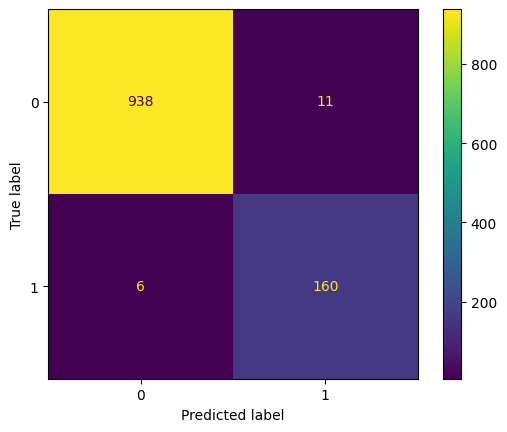

In [ ]:
from sklearn.metrics import ConfusionMatrixDisplay

preds = (spam_detect_model.predict(X_test) > 0.5).astype("int32")

c_report(y_test, preds) # text display

cm = confusion_matrix(y_test, preds)
cm_display = ConfusionMatrixDisplay(cm).plot() # visual display

In [ ]:
test_message = "Congratulations! You've been selected for an exclusive opportunity to earn $$$ in just a few days! Our revolutionary system guarantees incredible returns with minimal effort. Act now and click on the link below to claim your prize: [Link] Don't miss out on this once-in-a-lifetime chance! Join thousands who have already changed their lives. Best Regards,"
test_string_transformed = cv.transform([test_message]).toarray()

# Make prediction using the trained model
prediction = spam_detect_model.predict(test_string_transformed)

# Display the result
if prediction[0] == 1:
    print("The string is predicted as SPAM.")
else:
    print("The string is predicted as NOT SPAM.")

The string is predicted as SPAM.


In [ ]:
test_message = "spam"
test_string_transformed = cv.transform([test_message]).toarray()

# Make prediction using the trained model
prediction = spam_detect_model.predict(test_string_transformed)

# Display the result
if prediction[0] == 1:
    print("The string is predicted as SPAM.")
else:
    print("The string is predicted as NOT SPAM.")

The string is predicted as NOT SPAM.
